# **AVIATION ACCIDENTS RISK ANALYSIS**

# **1. Introduction and Business Understanding**
Our company is exploring entry into the aviation business by acquiring private and commercial operations aircrafts. 

To guide and inform this decison; we need a data driven risk analysis to gauge the risk associated with this venture. To get to this; we will analyze and understand the risks involved by focussing on

- Aircraft types and manufacturers
- Flight phases
- Weather conditions
- Injuries analysis

**Problem**: The aviation division lacks data-driven insights on aviation risks for informed investment.

**Stakeholder**: Head of Aviation Operations.

**Goal**: Insights will help the stakeholder make safer investment decisions by avoiding high-risk aircraft and conditions.

## **Overview**
This project will be using NTSB aviation accident database to answer below key question that will guide Stakeholders and real world questions related to investments in this industry:

- Which aircraft manufacturers and models are linked to the most fatal accidents?
- Are there specific phases of flight or weather conditions that present higher risks?
- How have accident trends evolved over time?
- How are injury types correlated?

# **2. Data Understanding**

**Data Source**:
- The Data source is from **[NTSB Aviation Accident Database (1962-present)](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)** — Civil aviation accidents in the U.S., its territories, and international waters.

**Why this data?**:
- This database contains comprehensive coverage of aviation accidenst, Aircraft information, flight conditions, injury states and many more that will help in answering our questions above. 

**Data Overview**:
- The data has 88,889 entries and 31 columns. The main features to help us in this Analysis are Aircraft Make, Model,Fatality,Phase of Flight, Weather Conditions, Accident Date and Location. 

**Limitations**:
- I note many missing values (e.g., Latitude, Longitude) and Data mostly concentrates on USA and may not fully represent the glaobal risks. 






In [26]:
#Importing Libraries to be used

import pandas as pd
import numpy as np
from numbers import Number
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
#Loading the Data from a CSV file
#We are encoding as the file stores characters using diffrent encoding.
df = pd.read_csv ('.\data\AviationData.csv', encoding='latin1', low_memory=False)

# Show the first 5 rows to familiarize with the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [28]:
#Shape of the Dataset

print(f" Dataset contains {df.shape[0]} Rows and {df.shape[1]} Columns.")

 Dataset contains 88889 Rows and 31 Columns.


In [29]:
#Display a summary description of the dataset
#shows entries count, column names,non-null counts and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### df.info Key Observations
- Date Columns (Event.Date, Publication.Date) are currently stored as object types — should be converted to datetime later.
- More than 50% OF Latitude and Longitude have missing values
- Country, Location, and Injury.Severity,FAR.Description and  Aircraft.Category have relatively minimal non-null counts.

In [30]:
#getting a statistical overview of the datasets numerical columns
#
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### df.describe Key Observations
- Possible data quality issues to check as we note events with 0 engines, Most Values are also zero with extreme outliers. 
- Most Aircrafts had 1 engine as per mean 1.15 and 75% is 1. 

In [31]:
# Missing Values Overview as noted above in Descending format

Missing_values=df.isnull().sum().sort_values(ascending=False)
Missing_values

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

### Missing Values Key Observations
- Key Columns like Investigation.Type, Event.Date, Accident.Number, and Event.Id have no missing values 
- Critical fields like Publication.Date, Total.Serious.Injuries, Total.Fatal.Injuries, and Total.Minor.Injuries have many missing items. 

# **3. Data Cleaning and Preparation**

##### *3.1 Handling missing values*



In [32]:
#Summarizing Missing Values by percentage

Missing_values_percentages = (Missing_values/len(df)) *100

Missing_summary =pd.DataFrame({"Missing values": Missing_values,"Percentages": Missing_values_percentages })

Missing_summary.head(10) #Top 10 Names

,Missing values,Percentages
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


- Dropping columns

In [33]:
#we drop columns with more that 50% missing entries and irrevant columns as earlier picked and as per above analysis

cols_to_drop=["Schedule","Air.carrier","FAR.Description","Aircraft.Category","Longitude","Latitude"] #missing many values
irrelevant_cols=['Accident.Number', 'Location','Airport.Code', 'Airport.Name', 'Investigation.Type', 'Schedule', 
                 'Purpose.of.flight','Registration.Number','Publication.Date','Report.Status']        #irrelevant columns to our questions
full_cols_to_drop = cols_to_drop+irrelevant_cols
clean_df = df.drop(columns=full_cols_to_drop) #we craete a new dataframe for cleaned data
clean_df.head(2)

,Event.Id,Event.Date,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19,United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown


- Replacing Values

In [34]:
# 1. Adjusting injury related fields missing or blank to zero (we assume no injuries)

injury_cols = [
    'Total.Fatal.Injuries', 
    'Total.Serious.Injuries', 
    'Total.Minor.Injuries', 
    'Total.Uninjured'
]

clean_df[injury_cols]=clean_df[injury_cols].fillna(0)

# 2. Replace 0 engines with one and blanks with 1 too- Most Aircrafts had 1 engine as per mean 1.15 and 75% is 1. 

clean_df["Number.of.Engines"] =clean_df["Number.of.Engines"].replace(0,1)
clean_df["Number.of.Engines"] =clean_df["Number.of.Engines"].fillna(1)


# 3. Filling missing values in important columns

importantant_cols = ['Weather.Condition', 'Broad.phase.of.flight', 'Aircraft.damage', 'Engine.Type']

clean_df[importantant_cols]=clean_df[importantant_cols].fillna("UNKNOWN")

# 4. replace weather condition to correct names 
clean_df["Weather.Condition"]=clean_df["Weather.Condition"].str.upper().str.strip()

clean_df["Weather.Condition"]=clean_df["Weather.Condition"].replace({'VMC': 'Clear weather','IMC': 'Bad weather','UNK': 'UNKNOWN'})

# 5. Cleaninhg Injury.Severity Column to align the Fatal entries to [Non-Fatal,FATAL,Incident,Minor,Serious]

clean_df['Injury.Severity'].unique().tolist() # view of the unique items

clean_df['Injury.Severity']=clean_df['Injury.Severity'].map(lambda x: "FATAL" if str(x).strip().upper().startswith("FATAL") else x)

clean_df['Injury.Severity'].value_counts(normalize=True)



Non-Fatal      0.766387
FATAL          0.202824
Incident       0.025248
Minor          0.002480
Serious        0.001968
Unavailable    0.001092
Name: Injury.Severity, dtype: float64

- Droping Rows

In [35]:
# we drop rows where colums has few missing values


small_missing_cols = ["Country","Injury.Severity",'Make', 'Model', 'Amateur.Built', 'Injury.Severity']
clean_df=clean_df.dropna(subset=small_missing_cols)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87474 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87474 non-null  object 
 1   Event.Date              87474 non-null  object 
 2   Country                 87474 non-null  object 
 3   Injury.Severity         87474 non-null  object 
 4   Aircraft.damage         87474 non-null  object 
 5   Make                    87474 non-null  object 
 6   Model                   87474 non-null  object 
 7   Amateur.Built           87474 non-null  object 
 8   Number.of.Engines       87474 non-null  float64
 9   Engine.Type             87474 non-null  object 
 10  Total.Fatal.Injuries    87474 non-null  float64
 11  Total.Serious.Injuries  87474 non-null  float64
 12  Total.Minor.Injuries    87474 non-null  float64
 13  Total.Uninjured         87474 non-null  float64
 14  Weather.Condition       87474 non-null

##### *3.2 Convert Date columns to Date Formats and year column add*

In [36]:
# Event.Date and Publication.Date columns type conversion to date
# Publication.Date column needs to be formated as it is not in iso format (YYYY-MM-DD)
# To Avoid errors, we use errors argument to convert invalid dates to NaT (Missing Date)

clean_df["Event.Date"]=pd.to_datetime(clean_df["Event.Date"],errors="coerce")


## Adding Year Column for the Event
clean_df["Event Year"]=clean_df["Event.Date"].dt.year



##### *3.4 Convert Data Types*

In [37]:
cols_to_numeric = ["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]

for col in cols_to_numeric:
    pd.to_numeric(clean_df[col], errors='coerce')



##### *3.3 Standardizing object columns*

In [38]:
#cleaning all object

clean_df[clean_df.select_dtypes(include="object").columns]=clean_df.select_dtypes(include="object").apply(lambda x: x.str.upper().str.strip())

##### *3.4 Our cleaned Data Overview*

In [39]:
print("__"*40)
print(f" Dataset contains {clean_df.shape[0]} Rows and {clean_df.shape[1]} Columns.")
print("__"*40)

print(clean_df.info())
print("__"*40)

________________________________________________________________________________
 Dataset contains 87474 Rows and 17 Columns.
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87474 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87474 non-null  object        
 1   Event.Date              87474 non-null  datetime64[ns]
 2   Country                 87474 non-null  object        
 3   Injury.Severity         87474 non-null  object        
 4   Aircraft.damage         87474 non-null  object        
 5   Make                    87474 non-null  object        
 6   Model                   87474 non-null  object        
 7   Amateur.Built           87474 non-null  object        
 8   Number.of.Engines       87474 non-null  float64       
 9   Engine.Type        

# **4. Data Analysis**

In [40]:
#set visualization style

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] =(10,6)

##### **4.1 Fatal accidents by manufacturer and model Analysis**

In [41]:
# Selecting fatal accidents only to concentrate the High-Risk accidents.

fatal_accidents_df=clean_df[clean_df["Injury.Severity"].str.startswith("FATAL")]

#group by Make and Model

fatal_by_make_model_grouped =(fatal_accidents_df.groupby(["Make","Model"]).agg({"Total.Fatal.Injuries": 'sum'}).sort_values(by="Total.Fatal.Injuries",ascending=False).reset_index())

#top 10 deadliest aircrafts
Top_10_fatal_Models = fatal_by_make_model_grouped.head(10)

Top_10_fatal_Models

,Make,Model,Total.Fatal.Injuries
0,BOEING,737,1348.0
1,BOEING,737-200,802.0
2,BOEING,777 - 206,534.0
3,CESSNA,172N,425.0
4,BOEING,MD-82,403.0
5,CESSNA,172,398.0
6,CESSNA,152,390.0
7,AIRBUS,A321,381.0
8,PIPER,PA-28-181,380.0
9,BOEING,747-168,349.0


*4.1.2 Top10 Fatal Models Visualization*

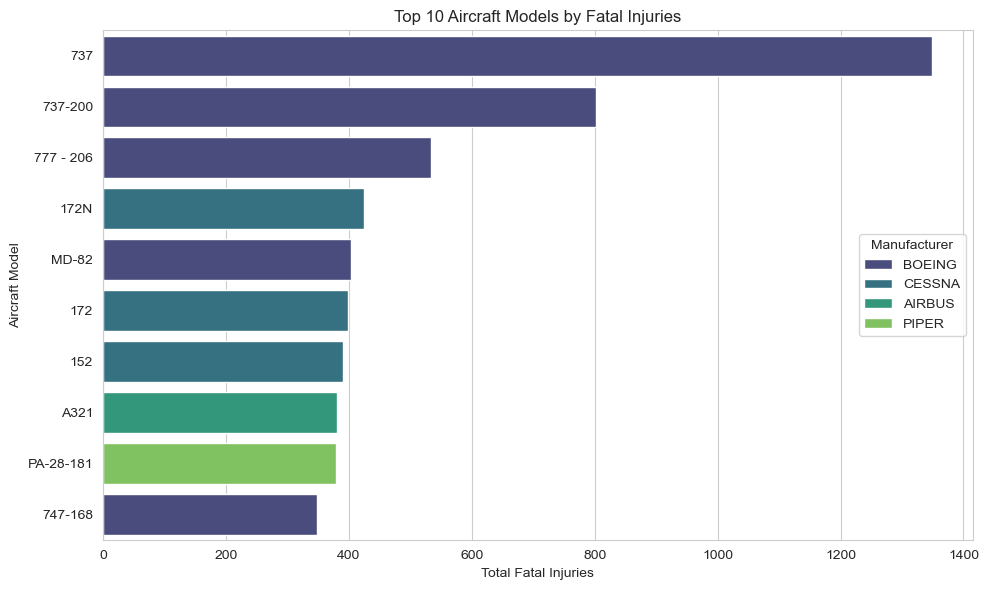

In [42]:
#Bar plot of top 10

sns.barplot(data=Top_10_fatal_Models, 
            x="Total.Fatal.Injuries", 
            y="Model",hue="Make", 
            dodge=False, 
            palette="viridis")
plt.title("Top 10 Aircraft Models by Fatal Injuries")
plt.xlabel("Total Fatal Injuries")
plt.ylabel("Aircraft Model")
plt.legend(title="Manufacturer")
plt.tight_layout()



**Top 10 Aircraft Models by Fatal Injuries visual observation**

- Boeing aircrafts are dominant and top of the list (position one to 3 by model) probably due to their widespread use but also warrants a closer examination of its safety records. 
- Cessna comes in forth, raising alarm noting it is a smaller aircraft often used in training and non-commercial activities. This raises questions around pilot experiences, flight conditions and maintenance as they are mostly flown by private pilots. 
- Airbus A321 and Piper PA-28-181 appear in the list but with fewer fatal injuries but still significant to be in the top list. 
- Commercial aircrafts are more in the fatal list due to their high flight numbers but smaller aircrafts like (Cessna, Piper) are also noted to have high fatal injuries.

**Business Insight and recomendation**

- Conduct detailed safety reviews before purchasing a boeing or Cessna models. 